<a href="https://colab.research.google.com/github/poojasrign/Deep-Learning/blob/main/Ex_3_Face_Reconition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (1560, 50, 37)
Number of classes: 12
Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.2975 - loss: 2.3726 - val_accuracy: 0.3520 - val_loss: 2.1421
Epoch 2/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.3130 - loss: 2.2012 - val_accuracy: 0.3520 - val_loss: 2.1191
Epoch 3/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.3302 - loss: 2.1732 - val_accuracy: 0.3520 - val_loss: 2.1396
Epoch 4/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.3663 - loss: 2.1432 - val_accuracy: 0.3520 - val_loss: 2.1339
Epoch 5/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.3183 - loss: 2.2239 - val_accuracy: 0.3520 - val_loss: 2.1221
Epoch 6/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.3234 - loss: 2.1879 - val_accuracy: 0.3520 - val_loss: 2.1304
Epoch 7/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.3356 - loss: 2.1886 - val_accuracy: 0.3520 - val_loss: 2.1176
Epoch 8/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.3325 - loss: 2.1775 - val_accuracy: 0.3520 - val_loss: 

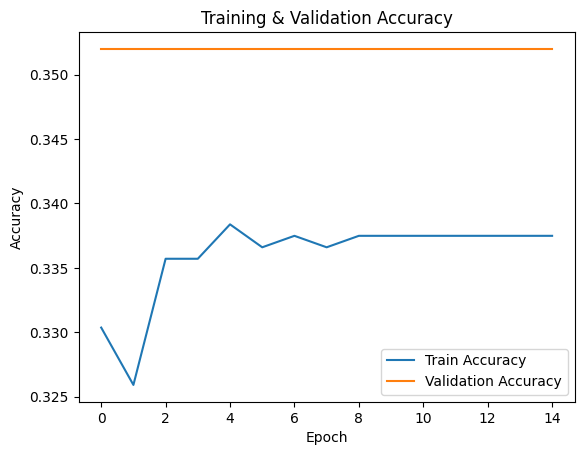

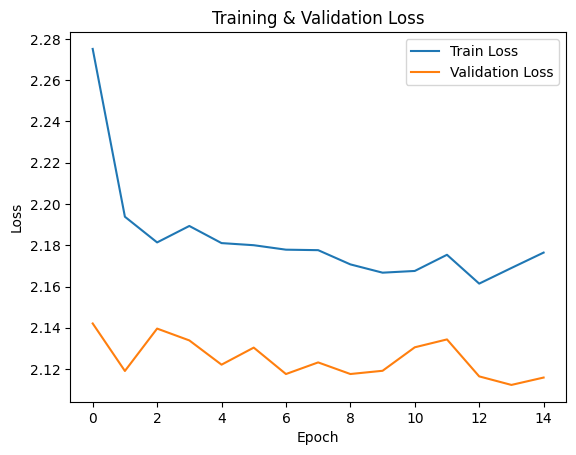

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset (only people with >=50 images)
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.4)
X = lfw.images
y = lfw.target
target_names = lfw.target_names

print("Dataset shape:", X.shape)
print("Number of classes:", len(target_names))

# Normalize and reshape
X = X / 255.0
X = X[..., np.newaxis]  # Add channel dimension: (samples, height, width, 1)

# One-hot encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Build CNN model with 3 Conv2D layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.show()

# Plot training & validation loss (error)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()